In [1]:
%matplotlib inline

import json
import tweepy
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from keys import key


In [2]:
with open('an_hsuan.json') as file:
    data = json.load(file)

In [3]:
target = data['an_hsuan'][1]
friends = data['NASA']

ids = [i['id'] for i in data['NASA']]
accounts = [target['id']]+ids
#accounts

In [4]:
graph = nx.Graph()

In [5]:
graph.add_nodes_from(accounts)
for friend in friends:
    graph.add_edge(target['id'], friend['id'])
    graph.nodes[target['id']]['screen_name'] = target['screen_name']
    graph.nodes[friend['id']]['screen_name'] = friend['screen_name']
    

In [6]:
mapping = {target['id']:target['screen_name']}
for friend in friends:
    mapping.update({friend['id']:friend['screen_name']})

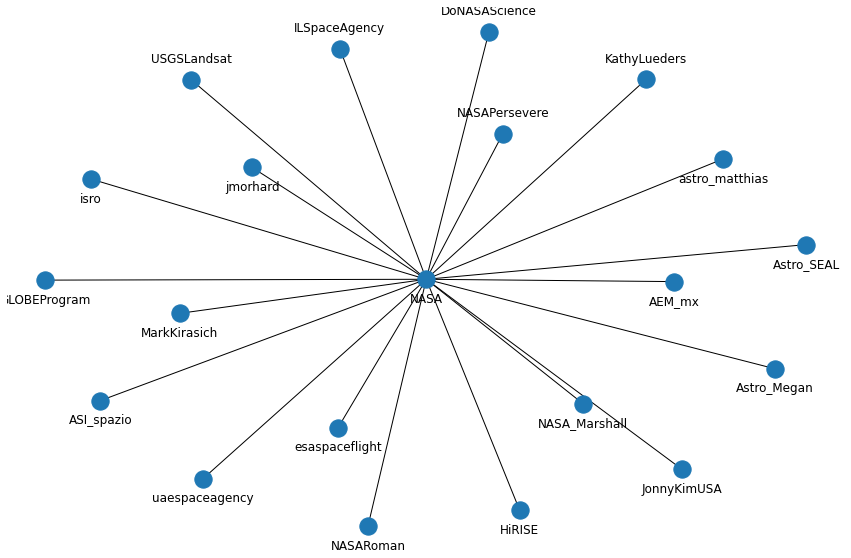

In [7]:
plt.figure(figsize=(15,10))
pos_orig=nx.spring_layout(graph)
pos_higher = {}
x_off = 0.05
y_off = 0.08 

for k, v in pos_orig.items():
    if (v[1]>0.5):
        pos_higher[k] = (v[0], v[1]+y_off)
    else:
        pos_higher[k] = (v[0], v[1]-y_off)
nx.draw_networkx(graph, pos = pos_orig, with_labels = False)
nx.draw_networkx_labels(graph, pos = pos_higher, labels = mapping)
plt.axis("off")
plt.show(block=False)

#plt.savefig('NASA_v1')

In [8]:
name = nx.get_node_attributes(graph,'screen_name')
#return dict with id as key, screen_name as value

#list(graph.nodes(data = True))
#graph = nx.relabel_nodes(graph,mapping)

In [9]:
with open('data.json') as file2:
    data2 = json.load(file2)

In [10]:
prim_ac_list = list(data2.keys())
ac_list = []
for i in range(len(prim_ac_list)):
    ac_list.append(int(prim_ac_list[i]))
    ac_list.extend(data2[prim_ac_list[i]])
    
len(ac_list)

51372

In [11]:
graph2 = nx.Graph()

In [12]:
graph2.add_nodes_from(ac_list)
for account in data2:
    for i in range(len(data2[account])):
        graph2.add_edge(account, data2[account][i])

In [13]:
remove = [node for node,degree in dict(graph2.degree()).items() if degree < 2]
graph2.remove_nodes_from(remove)

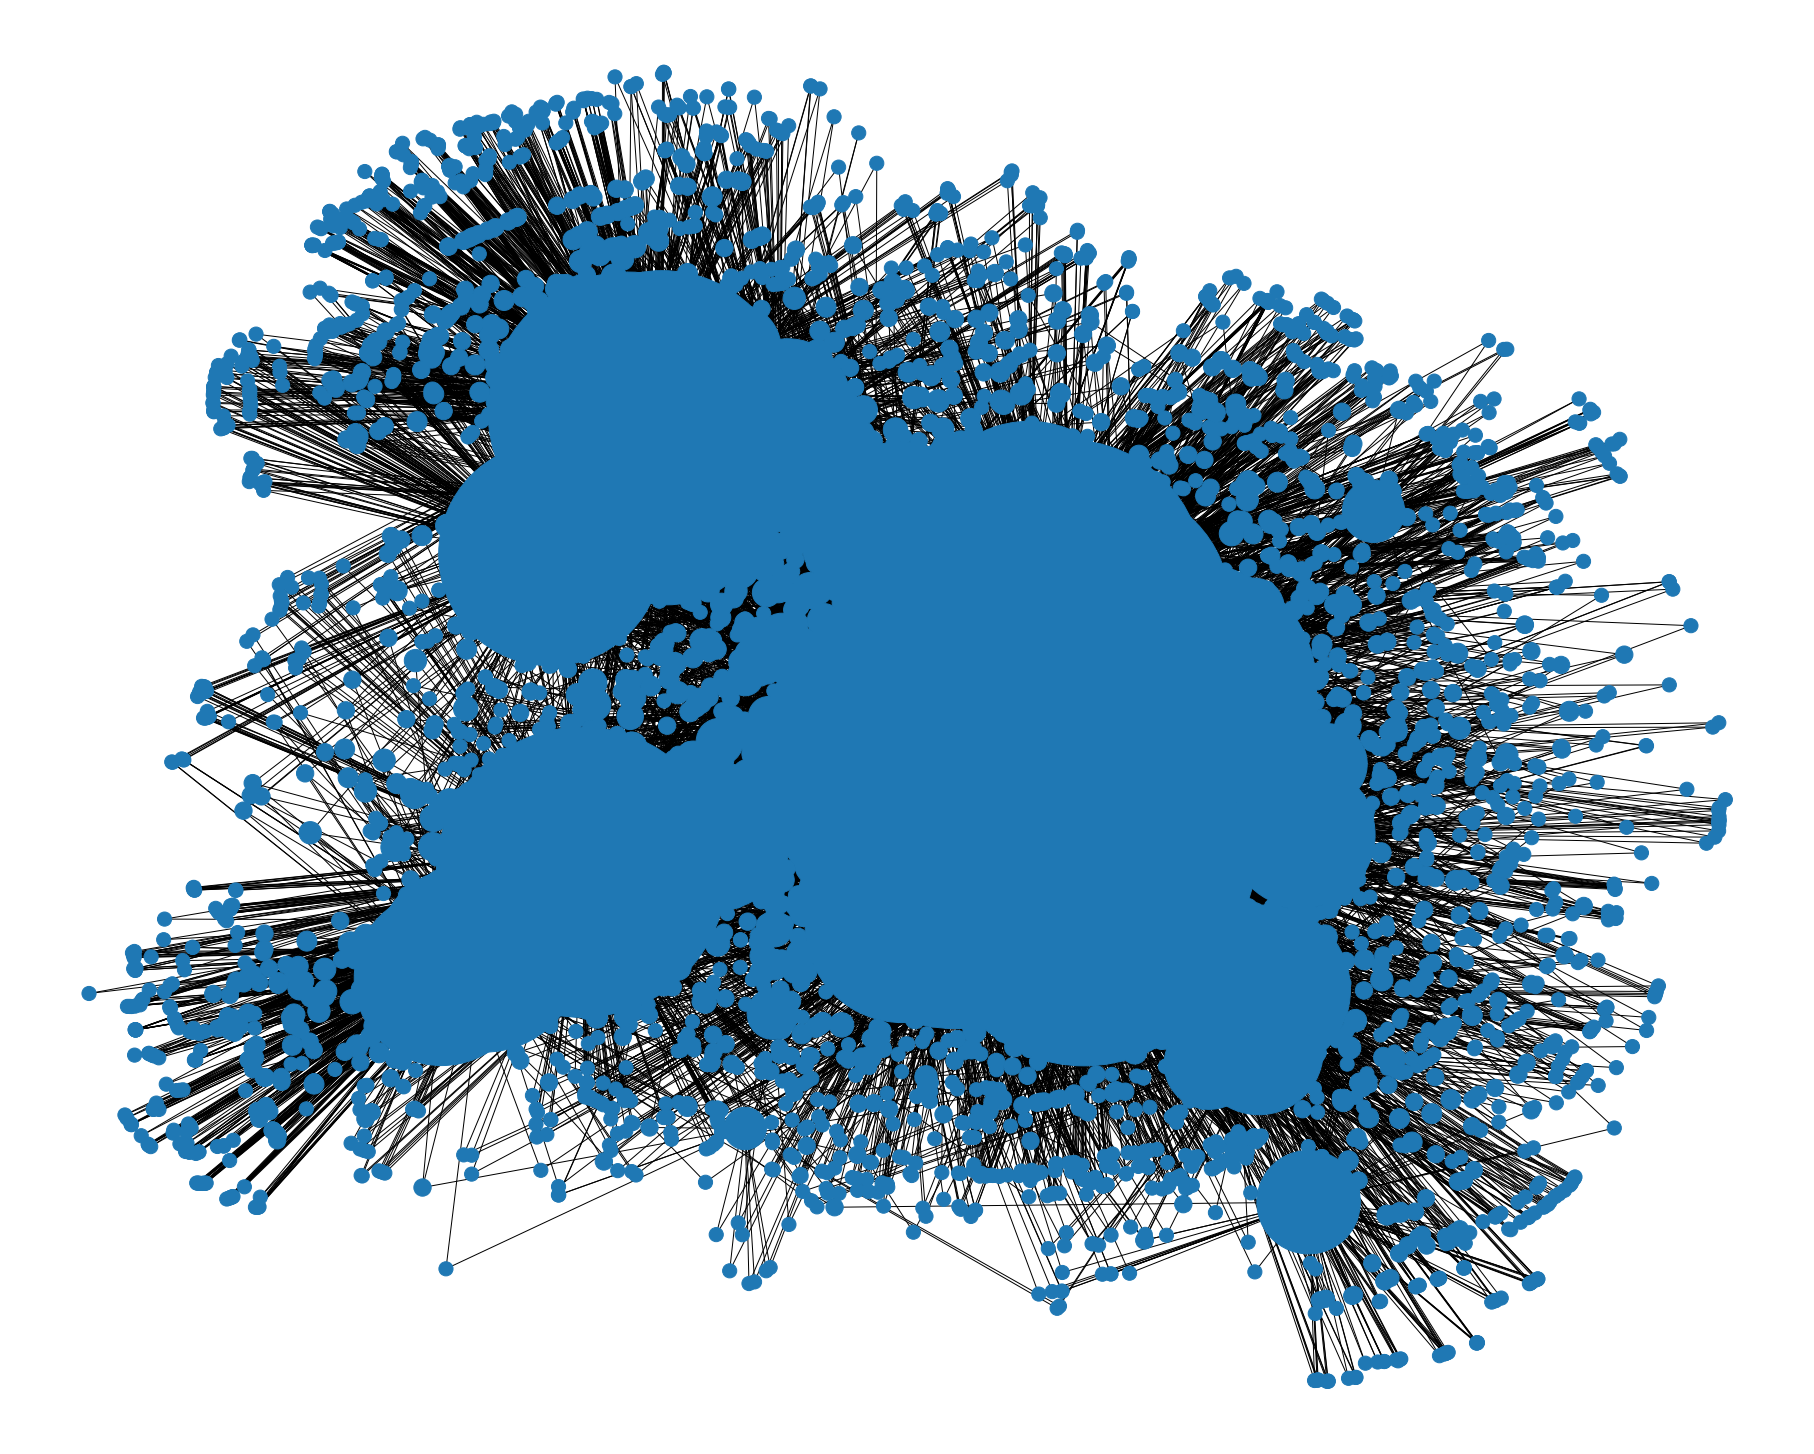

In [14]:
plt.figure(figsize=(25,20))
d = graph2.degree()
nx.draw(graph2, with_labels = False, node_size=[v * 100 for k,v in d])
#nx.draw_networkx_labels(graph, pos = pos_higher, labels = mapping)
plt.axis("off")
plt.show(block=False)

#plt.savefig('NASA_v3')

In [15]:
ac_list2 = []
for i in range(20):
    ac_list2.append(int(prim_ac_list[i]))
    ac_list2.extend(data2[prim_ac_list[i]])
    
len(ac_list2)

14598

In [16]:
graph3 = nx.Graph()

In [17]:
graph3.add_nodes_from(ac_list2)
acs = [prim_ac_list[i] for i in range(20)]
for account in acs:
    for i in range(len(data2[account])):
        graph3.add_edge(account, data2[account][i])

In [18]:
remove2 = [node for node,degree in dict(graph3.degree()).items() if degree < 2]
graph3.remove_nodes_from(remove2)

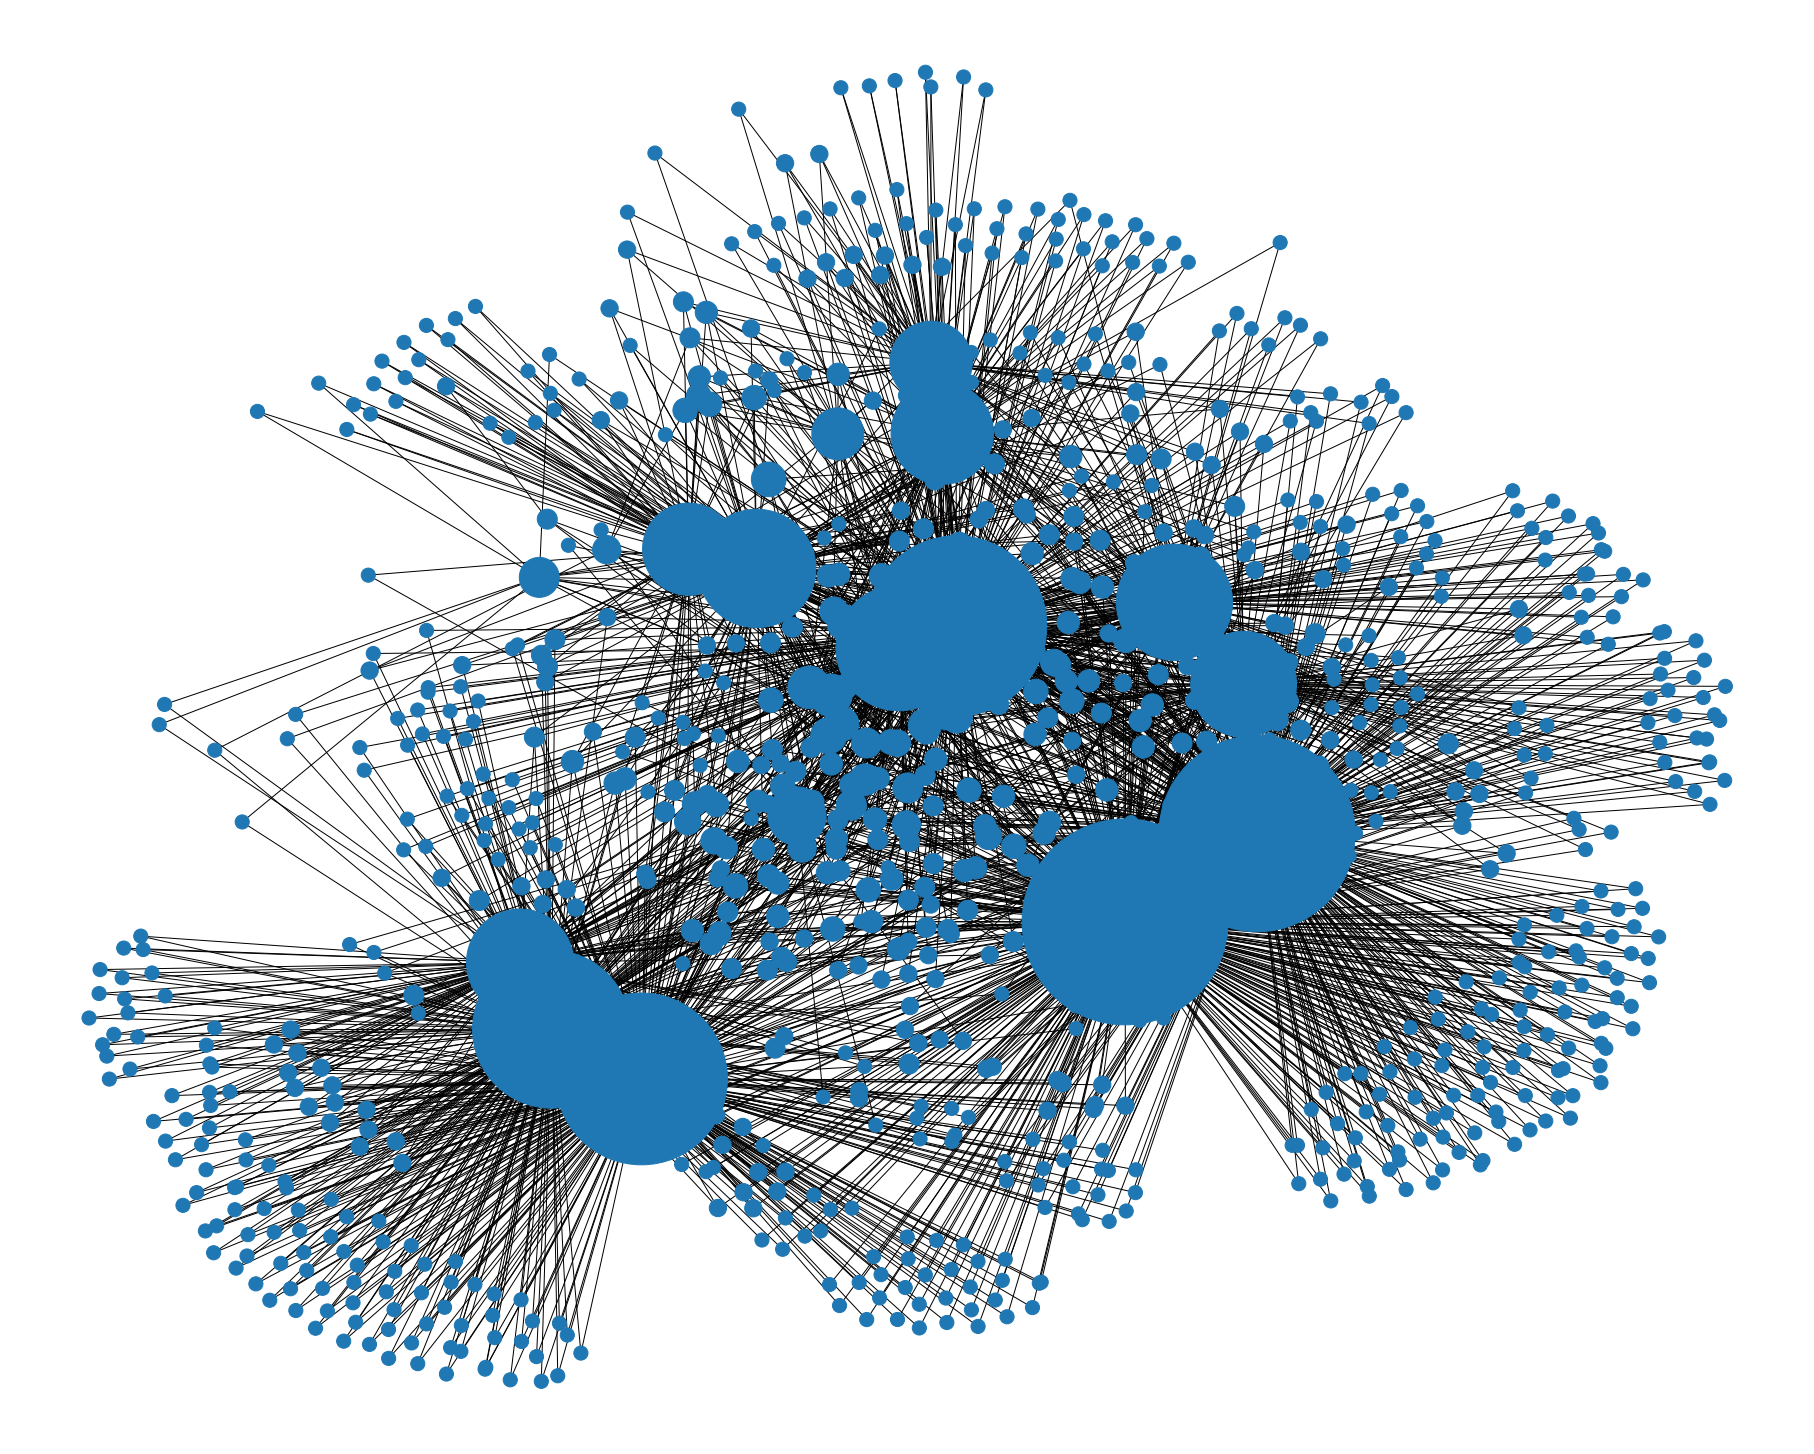

In [19]:
plt.figure(figsize=(25,20))
d = graph3.degree()
nx.draw(graph3, with_labels = False, node_size=[v * 100 for k,v in d])
#nx.draw_networkx_labels(graph, pos = pos_higher, labels = mapping)
plt.axis("off")
plt.show(block=False)

#plt.savefig('NASA_v4')